In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('/kaggle/input/mtc-asr-dataset/train.csv')

In [3]:
train_df.head()

,audio,transcript
0,train_sample_0,على إنها عار في الوقت اللي كانت بتتعامل مع أخو...
1,train_sample_1,فأكيد ربنا عوضهم خير هو الراجل بيبقى ليه إختيا...
2,train_sample_2,زي دول كتيره بنشوفها النهارده في العالم وأصبحت...
3,train_sample_3,يعني مين اللي بيحط شروطها يعني أنا شايفه إني م...
4,train_sample_4,والله هي الموضوع مش كليب خلي بالك ولا أغنيه ال...


In [4]:
train_df[train_df['audio'] == 'train_sample_34']

,audio,transcript
34,train_sample_34,إن انت تقنعهم إن هما لازم يتغيروا عشان يتغيروا...


In [5]:
len(train_df)

50715

In [6]:
adapt_df = pd.read_csv('/kaggle/input/mtc-asr-dataset/adapt.csv')

In [7]:
adapt_df.head()

,audio,transcript
0,adapt_sample_0_clean,شوفلنا المشوار ده يا حج
1,adapt_sample_1_clean,لأ للأسف دكتوره واحده بس بتعمل العمليه ديت عند...
2,adapt_sample_2_clean,والراجل تبصله يعني إبن زمنه
3,adapt_sample_3_clean,و أنت كيف عرفته أبترل يا عمي
4,adapt_sample_4_clean,ميعرفوش حاجه عن السوبر أه غير إنه لب


In [8]:
len(adapt_df)

2199

In [9]:
import librosa
import IPython.display as ipd

# Load and listen to the audio file
example_file = '/kaggle/input/mtc-asr-dataset/adapt/adapt_sample_4_clean.wav'
audio, sample_rate = librosa.load(example_file)

ipd.Audio(example_file, rate=sample_rate)

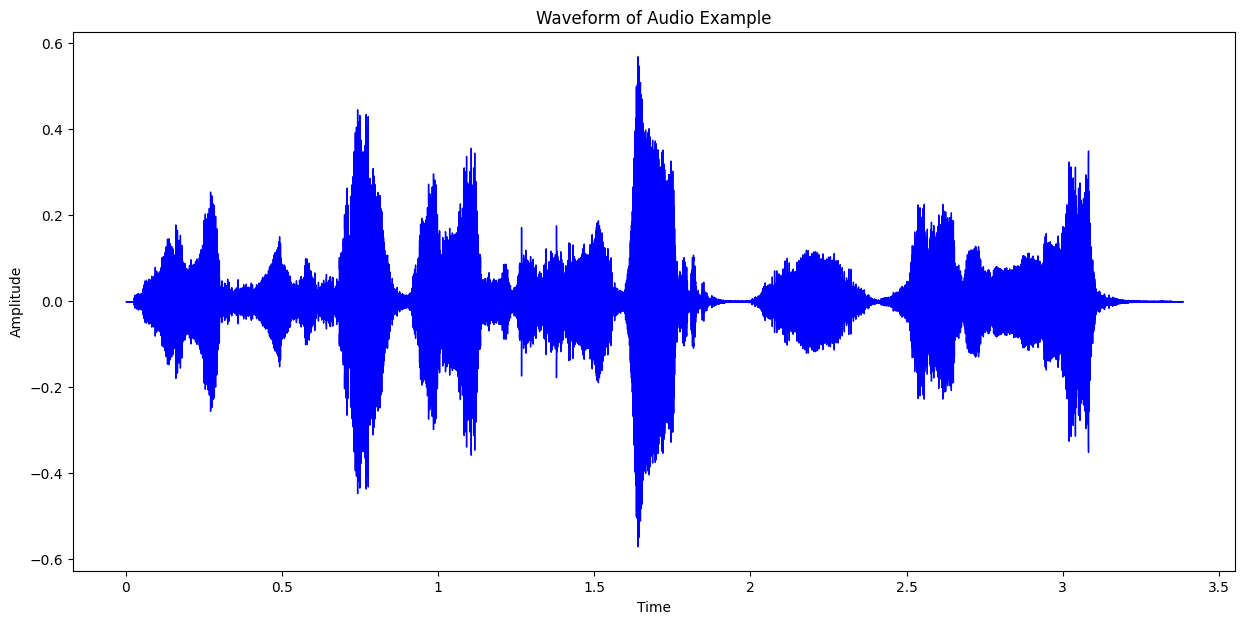

In [10]:
%matplotlib inline
import librosa.display
import matplotlib.pyplot as plt

# Plot our example audio file's waveform
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Waveform of Audio Example')
plt.ylabel('Amplitude')

_ = librosa.display.waveshow(audio, color='blue')

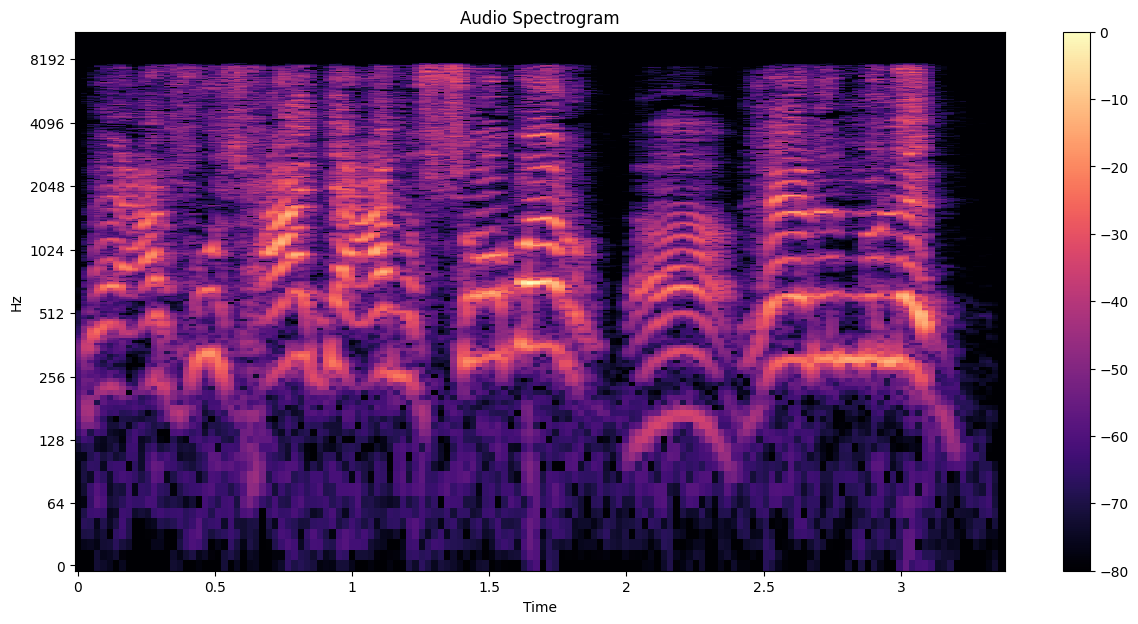

In [11]:
import numpy as np

# Get spectrogram using Librosa's Short-Time Fourier Transform (stft)
spec = np.abs(librosa.stft(audio))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)  # Decibels

# Use log scale to view frequencies
librosa.display.specshow(spec_db, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Audio Spectrogram');

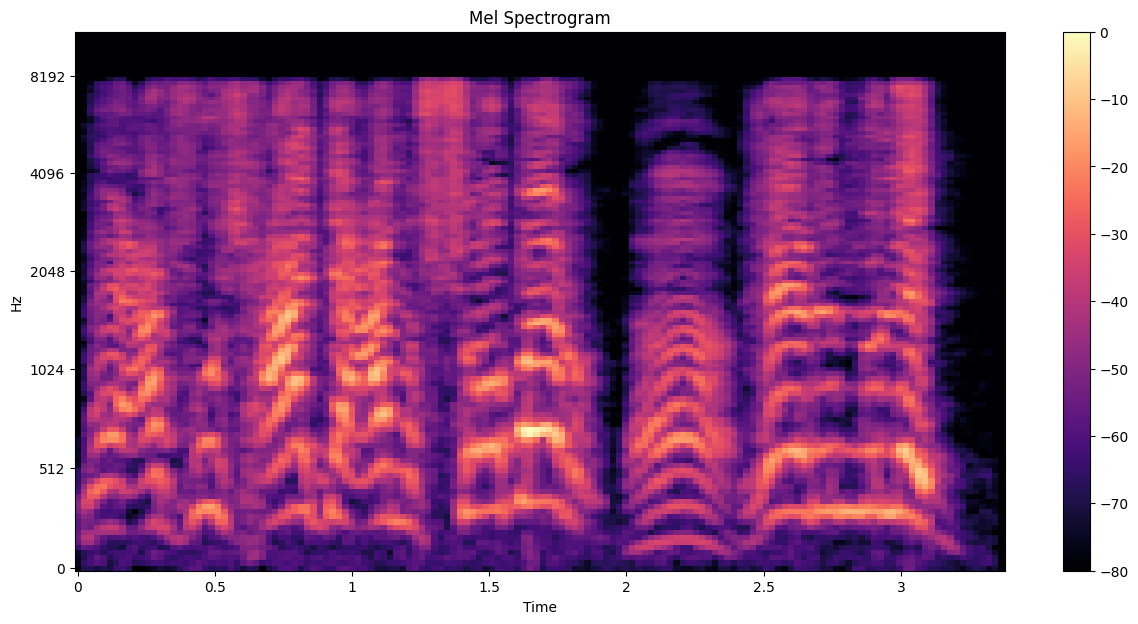

In [12]:
# Plot the mel spectrogram of our sample
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(
    mel_spec_db, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel Spectrogram');

In [13]:
#NeMo Manifest
import pandas as pd
import json



def create_manifest(mode):
    df = pd.read_csv(f'/kaggle/input/mtc-asr-dataset/{mode}.csv')
    manifest_file = f'{mode}.json'

    with open(manifest_file, 'w') as json_file:
      for index, row in df.iterrows():
          audio_path = f"/kaggle/input/mtc-asr-dataset/{mode}/{row['audio']}.wav"
          transcription = row['transcript']
          duration = librosa.core.get_duration(filename=audio_path)

          if duration is not None:
              manifest_data = {
                  "audio_filepath": audio_path,
                  "text": transcription,
                  "duration": duration
              }

          json.dump(manifest_data, json_file)
          json_file.write('\n')

create_manifest('train')
create_manifest('adapt')


print("Manifest file created successfully.")


/tmp/ipykernel_34/223246900.py:15: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.core.get_duration(filename=audio_path)
/tmp/ipykernel_34/223246900.py:15: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.core.get_duration(filename=audio_path)


Manifest file created successfully.


In [14]:
import librosa
import IPython.display as ipd
import json

manifest_files = [
    "train.json",
    "adapt.json",
]

# Function to check and print non-string text entries in manifest files
def check_manifest_file(manifest_filepath):
    with open(manifest_filepath, 'r') as f:
        for line in f:
            try:
                data = json.loads(line)
                text = data.get('text', None)
                if not isinstance(text, str):
                    audio_filepath = data.get('audio_filepath', 'Unknown')
                    duration = data.get('duration', 'Unknown')
                    print(f"Non-string text found in file {manifest_filepath}:")
                    print(f"  Audio Filepath: {audio_filepath}")
                    print(f"  Duration: {duration}")
                    print(f"  Text: {text}")  # Print the problematic text entry if needed

                    # Load and play audio
                    example_file = audio_filepath  # Use the audio_filepath from manifest
                    audio, sample_rate = librosa.load(example_file)
                    matching_row = train_df[train_df['audio'] == audio_filepath.split('/')[-1].split('.')[0]]
                    print(matching_row)
                    ipd.display(ipd.Audio(example_file, rate=sample_rate))
            except Exception as e:
                print(f"Error processing line in {manifest_filepath}: {str(e)}")

# Check manifest files
for manifest_file in manifest_files:
    check_manifest_file(manifest_file)

Non-string text found in file train.json:
  Audio Filepath: /kaggle/input/mtc-asr-dataset/train/train_sample_2047.wav
  Duration: 8.24
  Text: nan
                  audio transcript
2047  train_sample_2047        NaN


Non-string text found in file train.json:
  Audio Filepath: /kaggle/input/mtc-asr-dataset/train/train_sample_7697.wav
  Duration: 6.74
  Text: nan
                  audio transcript
7697  train_sample_7697        NaN


Non-string text found in file train.json:
  Audio Filepath: /kaggle/input/mtc-asr-dataset/train/train_sample_13717.wav
  Duration: 9.08
  Text: nan
                    audio transcript
13717  train_sample_13717        NaN


Non-string text found in file train.json:
  Audio Filepath: /kaggle/input/mtc-asr-dataset/train/train_sample_24389.wav
  Duration: 4.97
  Text: nan
                    audio transcript
24389  train_sample_24389        NaN


Non-string text found in file train.json:
  Audio Filepath: /kaggle/input/mtc-asr-dataset/train/train_sample_31478.wav
  Duration: 8.18
  Text: nan
                    audio transcript
31478  train_sample_31478        NaN


Non-string text found in file train.json:
  Audio Filepath: /kaggle/input/mtc-asr-dataset/train/train_sample_34484.wav
  Duration: 4.97
  Text: nan
                    audio transcript
34484  train_sample_34484        NaN


In [15]:
# Function to clean manifest files from Nans
def clean_manifest_file(manifest_filepath):
    cleaned_data = []
    with open(manifest_filepath, 'r') as f:
        for line in f:
            data = json.loads(line)
            text = data.get('text', None)
            if not isinstance(text, str):
                print(f"Cleaning non-string text: {text} in file {manifest_filepath}")
                data['text'] = ""  # Replace non-string text with an empty string or any default value
            cleaned_data.append(data)
    # Save cleaned data back to the manifest file
    with open(manifest_filepath, 'w') as f:
        for data in cleaned_data:
            f.write(json.dumps(data) + '\n')
    print(f"Cleaned {manifest_filepath}, total entries: {len(cleaned_data)}")

clean_manifest_file('train.json')
clean_manifest_file('adapt.json')
print("Manifest files cleaned successfully")

Cleaning non-string text: nan in file train.json
Cleaning non-string text: nan in file train.json
Cleaning non-string text: nan in file train.json
Cleaning non-string text: nan in file train.json
Cleaning non-string text: nan in file train.json
Cleaning non-string text: nan in file train.json
Cleaned train.json, total entries: 50715
Cleaned adapt.json, total entries: 2199
Manifest files cleaned successfully


In [16]:
!pip install beautifulsoup4

In [17]:
from bs4 import BeautifulSoup
import json

# Function to clean HTML tags from a string
def clean_html(raw_html):
    soup = BeautifulSoup(raw_html, "html.parser")
    return soup.get_text()

# Function to clean manifest files and remove HTML tags from text fields
def clean_manifest_file_html(manifest_filepath):
    cleaned_data = []
    with open(manifest_filepath, 'r') as f:
        for line in f:
            data = json.loads(line)
            text = data.get('text', None)
            if isinstance(text, str):
                cleaned_text = clean_html(text)
                data['text'] = cleaned_text
            cleaned_data.append(data)
    # Save cleaned data back to the manifest file
    with open(manifest_filepath, 'w') as f:
        for data in cleaned_data:
            f.write(json.dumps(data) + '\n')

# Example usage:
clean_manifest_file_html('train.json')
clean_manifest_file_html('adapt.json')

print("Manifest files cleaned successfully and HTML tags removed from text fields.")


Manifest files cleaned successfully and HTML tags removed from text fields.


In [1]:
import os
import json
import random

# Configuration
manifest_file = '/kaggle/input/nemo-cleaned-arabic-json/train.json'
train_ratio = 0.8  # 80% for training
dev_ratio = 0.1    # 10% for development
test_ratio = 0.1   # 10% for testing

# Load existing manifest data
manifest_data = []
if os.path.isfile(manifest_file):
    with open(manifest_file, 'r') as json_file:
        for line in json_file:
            manifest_data.append(json.loads(line))

# Shuffle the data
random.shuffle(manifest_data)

# Calculate split indices
total_samples = len(manifest_data)
train_end = int(total_samples * train_ratio)
dev_end = train_end + int(total_samples * dev_ratio)

# Split the data
train_data = manifest_data[:train_end]
dev_data = manifest_data[train_end:dev_end]
test_data = manifest_data[dev_end:]

# Define a function to write a subset to a JSON file
def write_subset(filename, data):
    with open(filename, 'w') as json_file:
        for entry in data:
            entry['audio_filepath'] = entry['audio_filepath']
            json.dump(entry, json_file)
            json_file.write('\n')

# Write the subsets to their respective files
write_subset('train_manifest.json', train_data)
write_subset('dev_manifest.json', dev_data)
write_subset('test_manifest.json', test_data)

print(f"Data split into train ({len(train_data)} samples), dev ({len(dev_data)} samples), and test ({len(test_data)} samples) sets.")


Data split into train (40572 samples), dev (5071 samples), and test (5072 samples) sets.


In [3]:
!pip install nemo_toolkit['asr']

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.2/787.2 kB 12.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━

In [4]:
# Build Tokenizer
!python /kaggle/input/nemo-repo/scripts/tokenizers/process_asr_text_tokenizer.py \
        --manifest='train_manifest.json' \
        --data_root="toke" \
        --vocab_size=1024 \
        --tokenizer="spe" \
        --spe_type="unigram" \
        --no_lower_case \
        --spe_character_coverage=1.0 \
        --log

[NeMo I 2024-06-28 14:24:57 sentencepiece_tokenizer:316] Processing toke/text_corpus/document.txt and store at toke/tokenizer_spe_unigram_v1024
sentencepiece_trainer.cc(178) LOG(INFO) Running command: --input=toke/text_corpus/document.txt --model_prefix=toke/tokenizer_spe_unigram_v1024/tokenizer --vocab_size=1024 --shuffle_input_sentence=true --hard_vocab_limit=false --model_type=unigram --character_coverage=1.0 --bos_id=-1 --eos_id=-1
sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: toke/text_corpus/document.txt
  input_format: 
  model_prefix: toke/tokenizer_spe_unigram_v1024/tokenizer
  model_type: UNIGRAM
  vocab_size: 1024
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_

In [9]:
HYDRA_FULL_ERROR=1
!python /kaggle/input/nemo-repo/examples/asr/asr_transducer/speech_to_text_rnnt_bpe.py \
  --config-path='/kaggle/input/nemo-repo/examples/asr/conf/fastconformer' --config-name='fast-conformer_transducer_bpe' \
  model.train_ds.manifest_filepath="train_manifest.json" \
  model.validation_ds.manifest_filepath="dev_manifest.json" \
  model.test_ds.manifest_filepath="test_manifest.json" \
  model.train_ds.max_duration=16 \
  model.train_ds.batch_size=16 \
  model.validation_ds.batch_size=16 \
  model.test_ds.batch_size=128 \
  model.tokenizer.dir="toke/tokenizer_spe_unigram_v1024" \
  model.tokenizer.type="bpe" \
  model.encoder.d_model=176 \
  model.encoder.n_layers=16 \
  model.encoder.n_heads=4 \
  trainer.devices=-1 \
  trainer.accelerator="gpu" \
  trainer.strategy="ddp" \
  trainer.max_epochs=100 \
  trainer.accumulate_grad_batches=4 \
  model.optim.name="adamw" \
  model.optim.betas="[0.9, 0.999]" \
  model.optim.weight_decay=0.0 \
  model.optim.sched.warmup_steps=2000

[NeMo W 2024-06-28 14:35:31 nemo_logging:349] /opt/conda/lib/python3.10/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    
[NeMo I 2024-06-28 14:35:31 speech_to_text_rnnt_bpe:73] Hydra config: name: FastConformer-Transducer-BPE
    model:
      sample_rate: 16000
      compute_eval_loss: false
      log_prediction: true
      rnnt_reduction: mean_volume
      skip_nan_grad: false
      model_defaults:
        enc_hidden: ${model.encoder.d_model}
        pred_hidden: 640
        joint_hidden: 640
      train_ds:
        manifest_filepath: train_manifest.json
        sample_rate: ${model.sample_rate}
        batch_size: 16
        shuffle: true
        num_workers: 8
        pin_memory: true
        max_duration: 16
        min_duration: 0.1
        is_tarred: false
